import pandas as pd
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# Polynomail Regression :

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

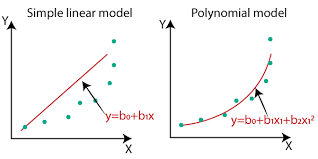

In [94]:
from PIL import Image
Image.open('Images/poly.png')

Formula Polynomial Regression: y =m1x1^2+m2x2^2....+c

In [95]:
%matplotlib notebook

In [96]:
#Importing the Dataset ...

from sklearn.datasets import load_boston

In [97]:
#Loading the data using object...

bost = load_boston()


In [98]:
#The Data is in the Dictionr=ary Format.So,Checking the Keys..

bost.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [99]:
#Making the DataFrame ...

df = pd.DataFrame(bost['data'],columns=bost['feature_names'])

<IPython.core.display.Javascript object>

In [100]:
#Assigning the Target Varibale to the DataFrame...

df['target'] = bost['target']

In [101]:
#Checking the DataaFrame...

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
#checking the Null, values in the dataset.

df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [103]:
#Checking the information of the dataframe..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [104]:
#Checking the Correlation...

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [105]:
#Dividing the data for training and testing.
X = df[['RM']]
y = df[['target']]

In [106]:
#Importing the Model LinearRegression

from sklearn.linear_model import LinearRegression

In [107]:
leg = LinearRegression()

In [108]:
leg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>


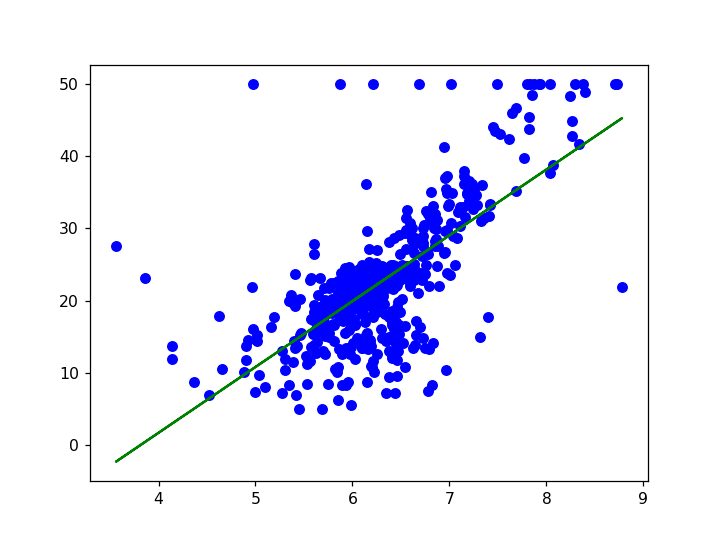

In [109]:
#Visualizing the data using scatter and plot to the Normal Features

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X,y,color="Blue")
plt.plot(X,leg.predict(X),color="Green")
plt.show()

In [110]:
#Importing the ALgorithm Polynomial Features....

from sklearn.preprocessing import PolynomialFeatures

In [111]:
poly = PolynomialFeatures(degree =3)

In [112]:
p1_x = poly.fit_transform(X)

In [113]:
#Importing the Linear Regression to the Polynomial Features...

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
linear = LinearRegression()

In [116]:
#Training the Model...
linear.fit(p1_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
#Checking the Accuracy of the Model..
linear.score(p1_x,y)

0.5612257226355388

In [118]:
%matplotlib notebook

<IPython.core.display.Javascript object>


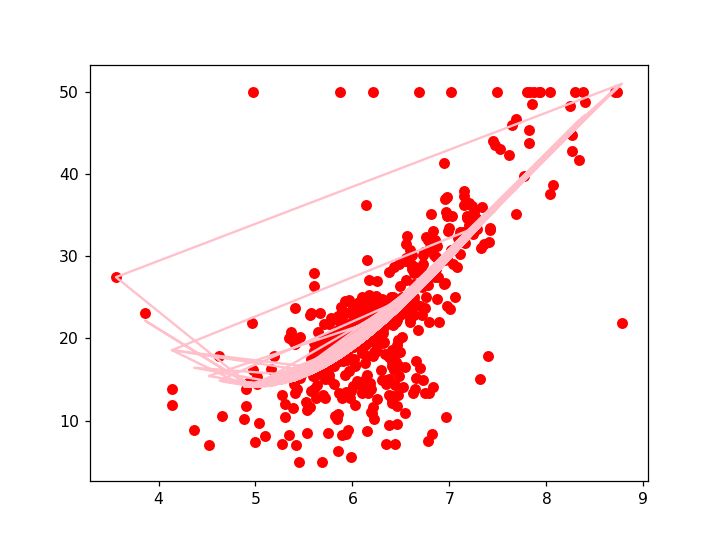

In [119]:
plt.scatter(X,y,color="Red")
plt.plot(X,linear.predict(p1_x),color="Pink")
plt.show()

In [120]:
#THis curve is for Polynomial Features....

HEre the Feature and Target in the polynomial Regression should be same ....

feature=1
Target =1